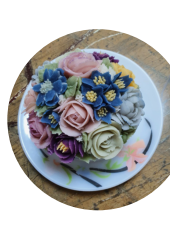

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('e:WORK/Python/Raschka/flower.jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((400, 500), radius=400, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

In [105]:
import dtale
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

<br>
<br>

# Boston 자료분석 1

In [3]:
# 보스톤 근교 지역에서 팔린 506개 주택 가격 및 특징 (features)

boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)

(506, 13)
(506,)


In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<br>
<br>

 - CRIM     per capita crime rate by town     타운별 1인당 범죄발생율
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.    25,000 평방 피트가 넘는 부지에 대한 주거용 토지의 비율
 - INDUS    proportion of non-retail business acres per town     타운당 비소매업 면적 (에이커)의 비율
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)     찰스 강 더미 변수 (트랙이 하천에 닿으면 1)
 - NOX      nitric oxides concentration (parts per 10 million)      일산화질소 농도 (천만 분의 1)
 - RM       average number of rooms per dwelling      주거당 평균 방수
 - AGE      proportion of owner-occupied units built prior to 1940      1940년 이전에 건축된 소유주 점유 주택의 비율
 - DIS      weighted distances to five Boston employment centres     5개의 보스턴 고용 센터까지의 가중 거리
 - RAD      index of accessibility to radial highways       방사형 고속도로 접근성 지수
 - TAX      full-value property-tax rate per `$10,000`      10,000 달러당 부동산세율
 - PTRATIO  pupil-teacher ratio by town     타운별 학생-교사 비율 (1 교사당 학생수)
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town     1000(Bk-0.63)^2, 여기서 Bk는 도시 별 흑인 비율
 - LSTAT    % lower status of the population     인구 중 하층 비율
 - MEDV     Median value of owner-occupied homes in `$1000's`     소유자 점유 주택의 중앙값 (단위: $1,000)

**참고**

**ppm**

백만분율은 수를 1,000,000과의 비로 나타내는 방법으로, ppm(parts per million)이라는 기호를 사용한다. ppm은 백만분의 1이라는 뜻이며, 고체시료의 농도를 나타낼 경우 1,000,000 mg(액체 1리터) 에 들어있는 용질의 mg수(또는 mg/kg)를 나타내며, 액체시료의 경우 용액의 밀도가 대부분 1mg/L라고 근사하여 1,000 ml 에 들어있는 용질의 mg수를 나타내기도 한다. 

ppm값을 10000으로 나누면 %(백분율)로 단위를 변환할 수 있다. 주로 대기나 해수, 지각 등에 존재하는 미량 성분의 농도를 나타낼 때 사용된다. 

예) 대기 중의 이산화탄소 농도 395 ppm = 395/1000000*100 = 0.0395 % 

**Parts-per notation**

https://en.wikipedia.org/wiki/Parts-per_notation

In science and engineering, the parts-per notation is a set of pseudo-units to describe small values of miscellaneous dimensionless quantities, e.g. mole fraction or mass fraction. Since these fractions are quantity-per-quantity measures, they are pure numbers with no associated units of measurement. Commonly used are parts-per-million (ppm, 10−6), parts-per-billion (ppb , 10−9), parts-per-trillion (ppt, 10−12) and parts-per-quadrillion (ppq, 10−15). This notation is not part of the International System of Units (SI) system and its meaning is ambiguous.

<br>
<br>

In [82]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [55]:
X_full

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [56]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
df = pd.DataFrame(X_full)

In [8]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [13]:
df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64

In [14]:
df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64

In [15]:
df.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

In [16]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [17]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64

In [23]:
# 각 특징의 최대값의 인덱스 (행의 위치))
df.idxmax()

CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
dtype: int64

In [24]:
# 각 특징의 최솟값의 인덱스
df.idxmin()

CRIM         0
ZN           1
INDUS      195
CHAS         0
NOX        286
RM         365
AGE         41
DIS        372
RAD          0
TAX        353
PTRATIO    196
B          450
LSTAT      161
dtype: int64

In [25]:
# 열별 합
df.sum()

CRIM         1828.44292
ZN           5750.00000
INDUS        5635.21000
CHAS           35.00000
NOX           280.67570
RM           3180.02500
AGE         34698.90000
DIS          1920.29160
RAD          4832.00000
TAX        206568.00000
PTRATIO      9338.50000
B          180477.06000
LSTAT        6402.45000
dtype: float64

In [26]:
# 열별 합
df.sum(axis = 'rows')

CRIM         1828.44292
ZN           5750.00000
INDUS        5635.21000
CHAS           35.00000
NOX           280.67570
RM           3180.02500
AGE         34698.90000
DIS          1920.29160
RAD          4832.00000
TAX        206568.00000
PTRATIO      9338.50000
B          180477.06000
LSTAT        6402.45000
dtype: float64

In [27]:
# 행별 합
df.sum(axis = 1)

0      810.89932
1      765.69441
2      739.47839
3      702.80057
4      716.04625
         ...    
501    787.39723
502    798.63577
503    810.24726
504    806.02549
505    801.66541
Length: 506, dtype: float64

In [28]:
# 행별 합
df.sum(axis = 'columns')

0      810.89932
1      765.69441
2      739.47839
3      702.80057
4      716.04625
         ...    
501    787.39723
502    798.63577
503    810.24726
504    806.02549
505    801.66541
Length: 506, dtype: float64

In [29]:
# 열별 누적합 (cumulative sum)
df.cumsum()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.03363,18.0,9.38,0.0,1.0070,12.996,144.1,9.0571,3.0,538.0,33.1,793.80,14.12
2,0.06092,18.0,16.45,0.0,1.4760,20.181,205.2,14.0242,5.0,780.0,50.9,1186.63,18.15
3,0.09329,18.0,18.63,0.0,1.9340,27.179,251.0,20.0864,8.0,1002.0,69.6,1581.26,21.09
4,0.16234,18.0,20.81,0.0,2.3920,34.326,305.2,26.1486,11.0,1224.0,88.3,1978.16,26.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1828.17989,5750.0,5587.49,35.0,278.3837,3154.105,34361.1,1910.9427,4828.0,205476.0,9254.5,178892.91,6373.37
502,1828.22516,5750.0,5599.42,35.0,278.9567,3160.225,34437.8,1913.2302,4829.0,205749.0,9275.5,179289.81,6382.45
503,1828.28592,5750.0,5611.35,35.0,279.5297,3167.201,34528.8,1915.3977,4830.0,206022.0,9296.5,179686.71,6388.09
504,1828.39551,5750.0,5623.28,35.0,280.1027,3173.995,34618.1,1917.7866,4831.0,206295.0,9317.5,180080.16,6394.57


In [30]:
# 짝수 행 레코드만 보여줌
df[df.index % 2 == 0]

2020-11-02 06:52:29,060 - INFO     - NumExpr defaulting to 8 threads.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08


In [31]:
df[df['AGE'] > 95]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68


In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [33]:
df[df['AGE'] > 95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


In [34]:
# 상관(계수)행렬 (Correlation Matrix)
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [35]:
# 분산-공분산행렬 (Variance-covariance Matrix)
df.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520


**pandas.DataFrame.sort_values 정렬**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

* DataFrame 정렬: DataFrame.sort_values()
* Tuple 정렬: sorted(tuple, key)
* List 정렬: list.sort(), sorted(list)

In [36]:
df.sort_values(by='ZN')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
505,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
439,9.39063,0.0,18.10,0.0,0.7400,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88
440,22.05110,0.0,18.10,0.0,0.7400,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
442,5.66637,0.0,18.10,0.0,0.7400,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88


In [37]:
df.sort_values(by='ZN', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
57,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
96,0.11504,0.0,2.89,0.0,0.4450,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


In [39]:
# inplace = True: 메모리에 저정되어 있는 데이터를 영구적으로 정렬함
df.sort_values(by='ZN', inplace = True)

In [40]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
505,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
13,0.62976,0.0,8.14,0.0,0.5380,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56


In [19]:
# 특징 'AGE'
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

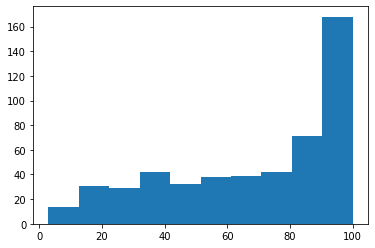

In [18]:
plt.hist(df['AGE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e60efd3250>,
 'caps': [<matplotlib.lines.Line2D at 0x1e60efd3940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e60f049eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e60efe2040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e60efe23a0>],
 'means': []}

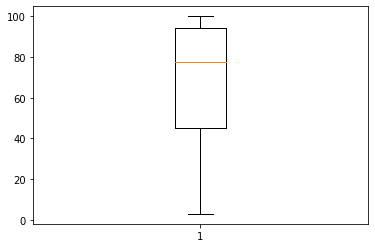

In [22]:
plt.boxplot(df['AGE'])

In [41]:
# fit() 메서드와 get_support() 메서드 사용
# # F-통계량 사용하여 변수 선택

selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)

X = X_full[:, selector.get_support()]
print (X.shape)

(506, 1)


In [43]:
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

**SelectKBest() 함수**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [42]:
# 13 번째 특징 (LSTAT)
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [44]:
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

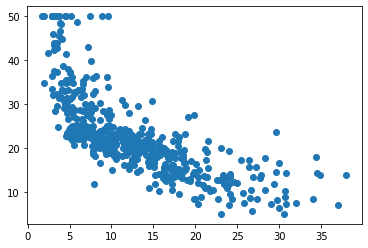

In [45]:
plt.scatter(X, Y)

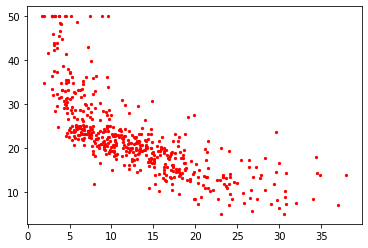

In [46]:
plt.scatter(X, Y, s=5, marker='o', color='red')

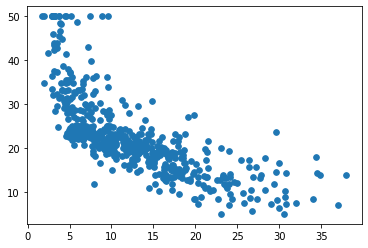

In [48]:
def plot_scatter(X,Y,R=None):
        plt.scatter(X, Y, s=32, marker='o')
        if R is not None:
                plt.scatter(X, R, color='red', linewidth=0.5)
        plt.show()

plot_scatter(X,Y)

### 단순선형회귀분석 (Simple Linear Regression)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

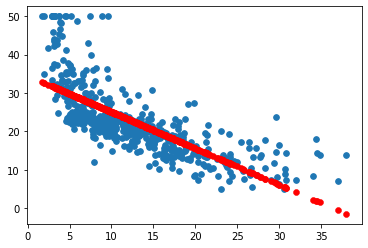

In [49]:
regressor = LinearRegression(normalize=True).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

In [50]:
print("slope = ",regressor.coef_)
print("y-intercept = ", regressor.intercept_)

slope =  [-0.95004935]
y-intercept =  34.55384087938311


### SVM (Support Vector Machine)--based regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html    

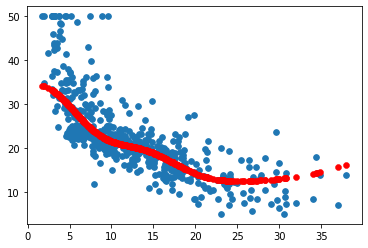

In [51]:
regressor = SVR().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

### Random Forest-based regression 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

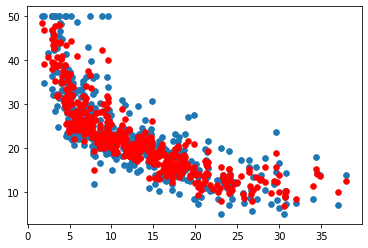

In [53]:
regressor = RandomForestRegressor().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

## Python Cheat Sheets

https://www.datacamp.com/community/data-science-cheatsheets

<br>
<br>

# Boston 자료분석 2

## 데이터 읽기

In [88]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [89]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [90]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [91]:
data_boston['PRICE'] = boston.target
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [93]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [94]:
data_boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [95]:
data_boston.shape

(506, 14)

## 시각화

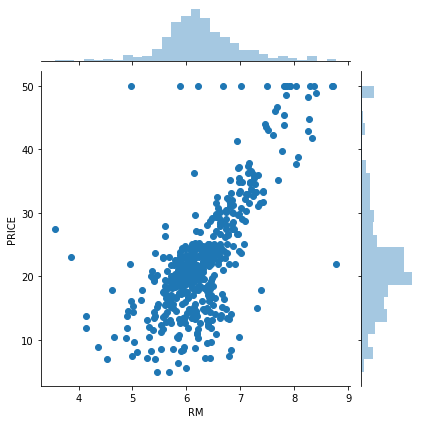

In [96]:
sns.jointplot('RM', 'PRICE', data=data_boston)

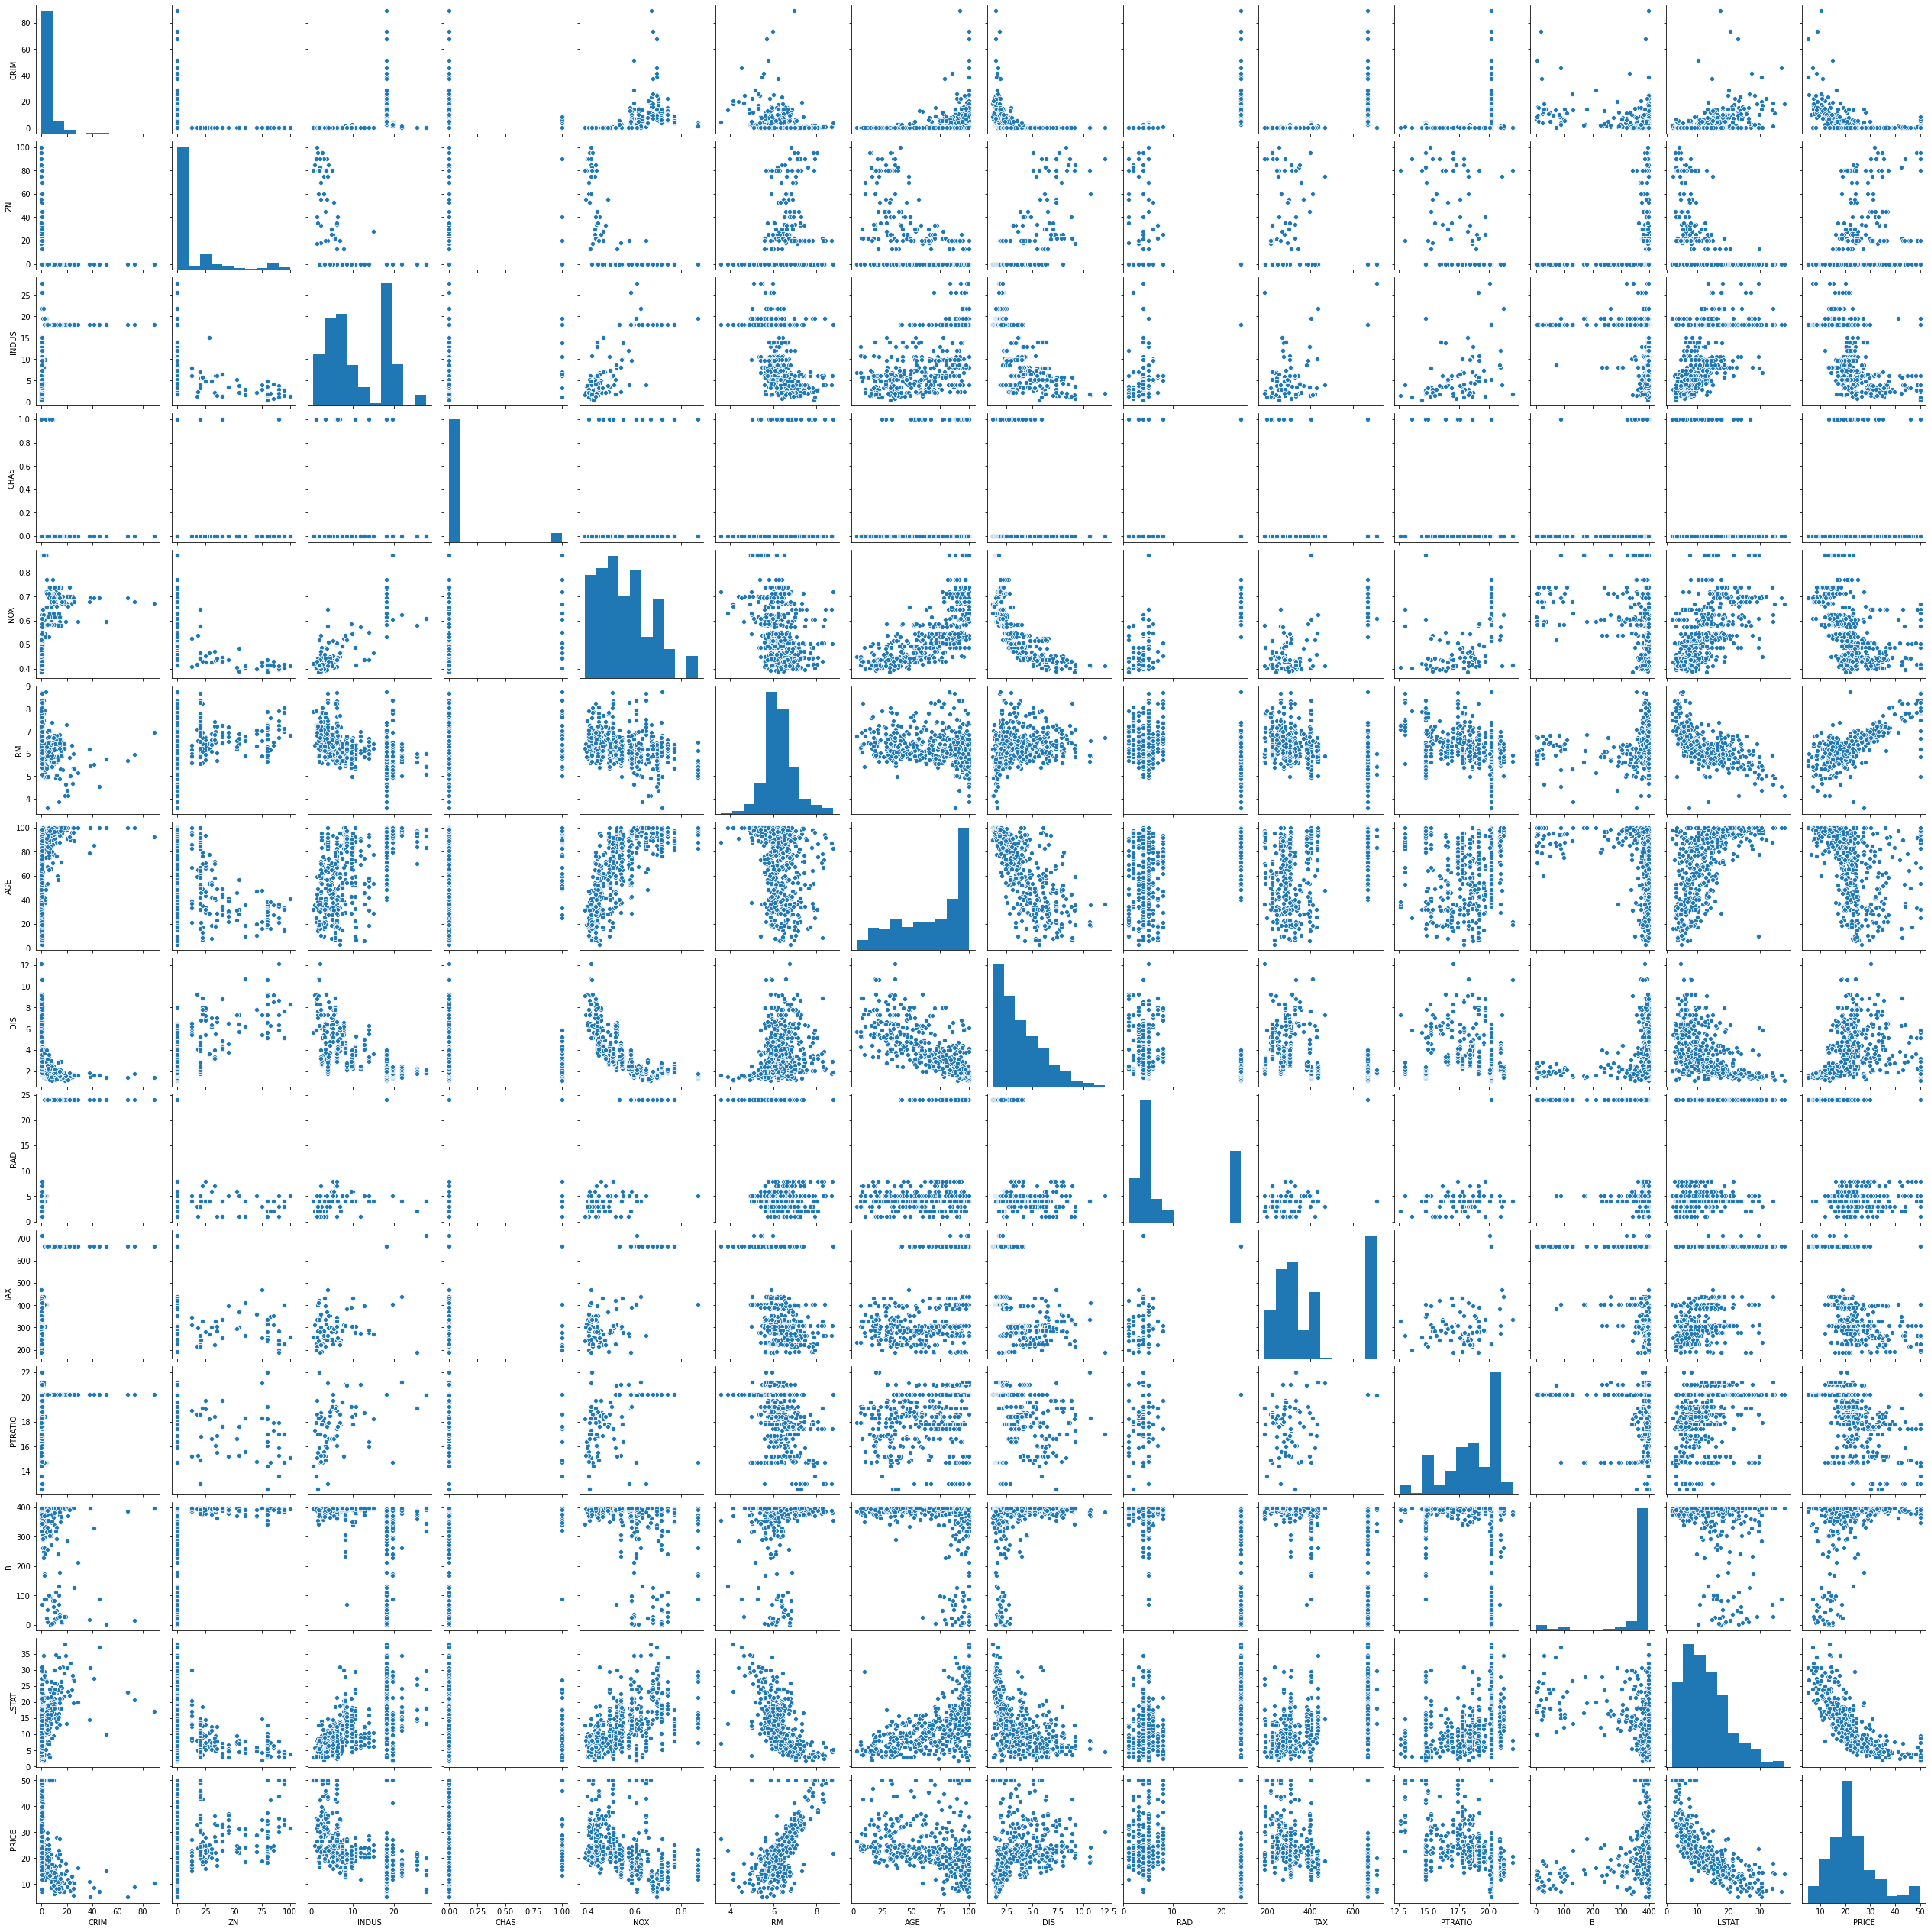

In [98]:
sns.pairplot(data_boston)

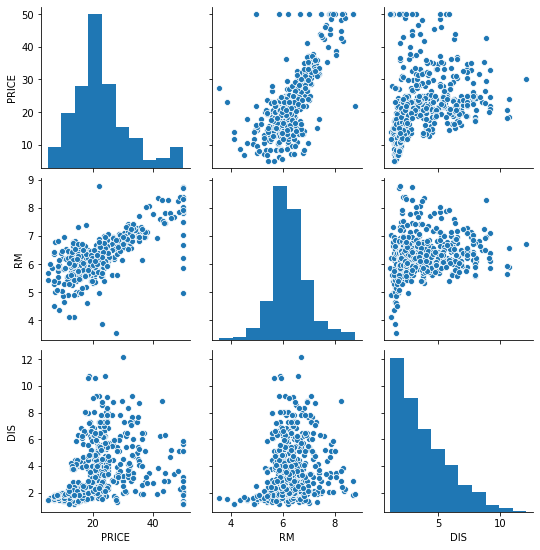

In [99]:
sns.pairplot(data_boston, vars=["PRICE", "RM", "DIS"])

In [111]:
data_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 선형회귀

### 단순선형회귀분석

In [100]:
lr = LinearRegression()

In [101]:
x_column_list = ['RM']
y_column_list = ['PRICE']

data_boston_x = data_boston[x_column_list]
data_boston_y = data_boston[y_column_list]

lr.fit(data_boston_x, data_boston_y)

LinearRegression()

In [102]:
print(lr.coef_)
print(lr.intercept_)

[[9.10210898]]
[-34.67062078]


머신러닝에서는 회귀분석시 통계적 추론 (추정, 검정) 자체에 큰 관심이 없음. 즉, 회귀직선식에 대한 t-검정, F-검정, 분산분석, 결정계수 계산 등에 큰 관심이 없음

머신러닝에서 회귀분석시 중요한 관심: 학습 데이터에 대한 훈련을 실시한 후 테스트 데이터를 대상으로 얼마나 예측력이 좋은 지 여부

In [103]:
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [104]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('PRICE ~ RM', data=data_boston).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           2.49e-74
Time:                        07:49:55   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

* Jarque-Bera (JB) Normality test (쟈크베라 [하르케-베라]의 정규성 검정): 왜도와 첨도를 시용함

### 중회귀분석

In [106]:
lr_multi = LinearRegression()

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

data_boston_x = data_boston[x_column_list_for_multi]
data_boston_y = data_boston[y_column_list_for_multi]

lr_multi.fit(data_boston_x,  data_boston_y)

LinearRegression()

In [107]:
print(lr_multi.coef_)
print(lr_multi.intercept_)

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
[36.45948839]


## 예측

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_boston_x, data_boston_y, test_size=0.3)

### 중회귀분석

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [112]:
lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
print(lr_multi2.coef_)
print(lr_multi2.intercept_)

[[-1.27725442e-01  4.37913308e-02  4.96277914e-02  3.14000065e+00
  -1.62557499e+01  3.98935449e+00 -1.34168250e-02 -1.54127064e+00
   2.37485015e-01 -7.92291472e-03 -9.70794596e-01  1.27540463e-02
  -5.28573550e-01]]
[33.48678788]


In [113]:
y_pred = lr_multi2.predict(X_test)
y_pred

array([[1.87909930e+01],
       [2.69210968e+00],
       [2.44645783e+01],
       [7.99327967e+00],
       [3.83240900e+01],
       [1.92161816e+01],
       [2.89735306e+01],
       [1.18592954e+01],
       [2.39713086e+01],
       [3.42549082e+01],
       [1.34046955e+01],
       [1.25793379e+01],
       [2.20203277e+01],
       [2.14125251e+01],
       [2.05004090e+01],
       [9.42191336e+00],
       [1.40477190e+01],
       [3.06650568e+01],
       [2.59836856e+01],
       [1.91007718e+01],
       [2.03400133e+01],
       [2.01913407e+01],
       [2.58966338e+01],
       [2.29063667e+01],
       [2.31421395e+01],
       [1.68389673e-02],
       [1.97585049e+01],
       [2.40589279e+01],
       [2.82479531e+01],
       [1.28036847e+01],
       [2.46850514e+01],
       [2.72371750e+01],
       [3.52342403e+01],
       [3.20559058e+01],
       [4.34850495e+01],
       [2.46036778e+01],
       [3.89270100e+01],
       [4.01044491e+00],
       [2.48337091e+01],
       [3.24988763e+01],


In [114]:
resid = y_pred - y_test
print(resid)

         PRICE
102   0.190993
384  -6.107890
96    3.064578
48   -6.406720
224  -6.475910
..         ...
160   6.659622
396   7.185743
248  -3.591507
64  -10.413089
109   0.354192

[152 rows x 1 columns]


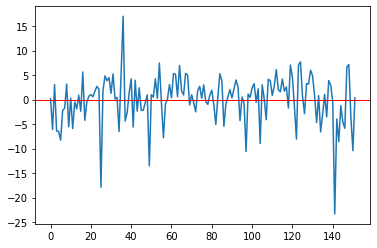

In [115]:
x = range(152)
plt.plot(x, resid)
plt.axhline(y=0, color="r", linewidth=1)
plt.show()

In [116]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

## MAE

### 단순선형회귀분석

In [117]:
x_column_list = ['RM']
y_column_list = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list], data_boston[y_column_list], test_size=0.3)

lr_single = LinearRegression()

lr_single.fit(X_train, y_train) 
y_pred = lr_single.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

4.7560584108053705


In [118]:
print(mean_squared_error(y_pred, y_test))

53.0676954105739


In [119]:
print(median_absolute_error(y_pred, y_test))

2.8637027819385334


In [120]:
print(r2_score(y_pred, y_test))

-0.32808324525586463


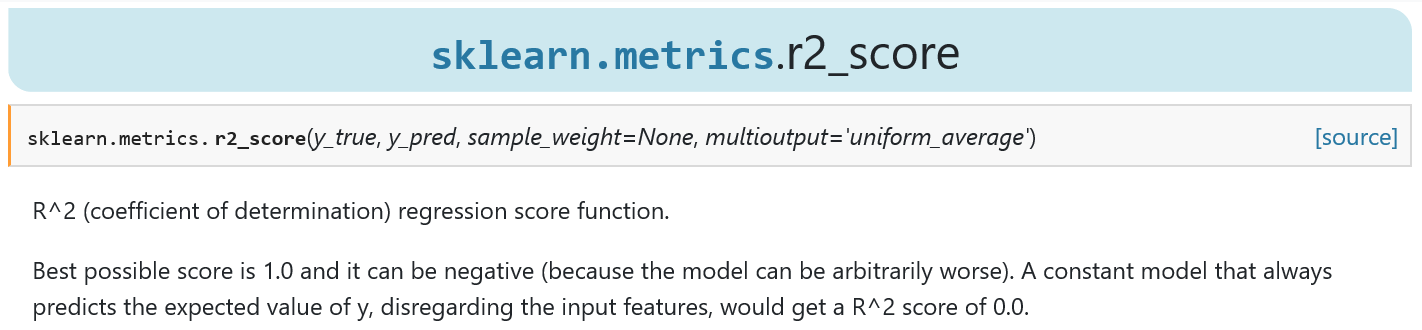

In [121]:
from IPython.display import Image
Image("e:/WORK/Python/Raschka/sklearn.metrics.r2_score.png") 

**scikit-learn 0.22.2** 

API Reference

https://scikit-learn.org/stable/modules/classes.html

sklearn.metrics: Metrics

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

3.3. Metrics and scoring: quantifying the quality of predictions

https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

3.3.4. Regression metrics

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [122]:
y_test

,PRICE
395,13.1
1,21.6
412,17.9
137,17.1
401,7.2
...,...
475,13.3
179,37.2
164,22.7
261,43.1


In [123]:
sorted(y_test['PRICE'])

[5.0,
 7.2,
 8.1,
 8.3,
 9.5,
 9.7,
 10.2,
 10.2,
 10.4,
 10.4,
 10.5,
 11.3,
 11.5,
 11.7,
 11.8,
 12.7,
 13.1,
 13.1,
 13.1,
 13.2,
 13.3,
 13.4,
 13.6,
 13.8,
 13.8,
 14.1,
 14.2,
 14.3,
 14.4,
 14.6,
 15.0,
 15.0,
 15.0,
 15.1,
 15.2,
 15.3,
 15.6,
 16.0,
 16.1,
 16.1,
 16.2,
 16.4,
 16.6,
 16.7,
 16.8,
 17.1,
 17.1,
 17.2,
 17.3,
 17.4,
 17.6,
 17.7,
 17.8,
 17.9,
 18.4,
 18.4,
 18.6,
 18.8,
 18.9,
 18.9,
 19.2,
 19.5,
 19.6,
 19.8,
 19.9,
 20.0,
 20.0,
 20.0,
 20.1,
 20.1,
 20.1,
 20.2,
 20.4,
 20.4,
 20.5,
 20.5,
 20.6,
 20.6,
 20.6,
 21.1,
 21.2,
 21.4,
 21.5,
 21.6,
 21.7,
 21.7,
 21.8,
 21.9,
 22.0,
 22.0,
 22.0,
 22.2,
 22.3,
 22.4,
 22.4,
 22.5,
 22.6,
 22.7,
 22.8,
 22.9,
 23.0,
 23.0,
 23.1,
 23.2,
 23.2,
 23.3,
 23.5,
 23.6,
 23.7,
 23.9,
 24.1,
 24.1,
 24.4,
 24.5,
 24.7,
 24.8,
 25.0,
 25.3,
 26.4,
 26.6,
 26.7,
 27.5,
 27.5,
 28.0,
 28.1,
 28.4,
 28.6,
 28.7,
 28.7,
 29.0,
 29.9,
 30.1,
 31.0,
 32.5,
 32.9,
 33.8,
 34.9,
 35.1,
 35.2,
 36.2,
 37.0,
 37.2,
 37.6,
 37.9

In [124]:
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_pred

,pred
0,24.495542
1,24.021526
2,7.023333
3,24.334377
4,23.282062
...,...
147,21.566126
148,29.321019
149,18.646191
150,34.440386


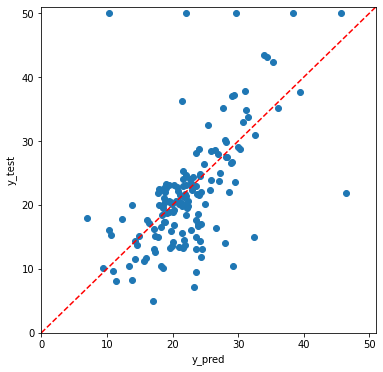

In [125]:
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, y_test)
plt.xlim(0, 51)
plt.ylim(0, 51)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.plot(x, x, 'r--')
plt.show()

### 중회귀분석

In [126]:
# 중회귀모형에서의 MAE 3.397104143127417: 단순회귀모형에서의 MAE 4.443085996515984의 76% 

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list_for_multi], data_boston[y_column_list_for_multi], test_size=0.3)

lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
y_pred = lr_multi2.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

3.721726405178314


In [127]:
y_test

,PRICE
494,24.5
50,19.7
481,23.7
307,28.2
132,23.0
...,...
31,14.5
10,15.0
5,28.7
482,25.0


In [128]:
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_pred

,pred
0,20.537869
1,22.259801
2,25.892969
3,31.534864
4,19.597331
...,...
147,17.828005
148,20.085682
149,25.083935
150,27.198706


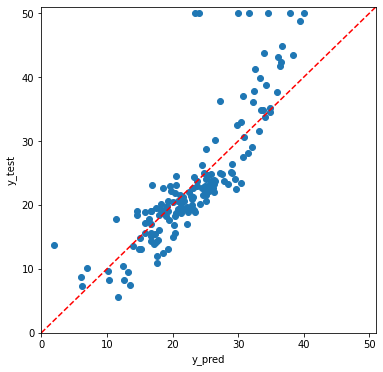

In [129]:
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, y_test)
plt.xlim(0, 51)
plt.ylim(0, 51)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.plot(x, x, 'r--')
plt.show()

## 중회귀분석과 축소추정량의 비교

### 중회귀분석

In [130]:
lr_multi = LinearRegression()

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

lr_multi.fit(data_boston[x_column_list_for_multi],  data_boston[y_column_list_for_multi])

print(lr_multi.coef_)
print(lr_multi.intercept_)

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
[36.45948839]


In [131]:
X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list_for_multi], data_boston[y_column_list_for_multi], test_size=0.3)

### 예측과 MAE

In [132]:
lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
print(lr_multi2.coef_)
print(lr_multi2.intercept_)

y_pred_lr = lr_multi2.predict(X_test)

# 残差
# print(y_pred_lr-y_test)

# MAE
print(mean_absolute_error(y_pred_lr, y_test))

[[-1.21736475e-01  5.01024442e-02  5.35552801e-02  3.24485735e+00
  -2.35013987e+01  3.59289425e+00  1.78997568e-02 -1.52132845e+00
   3.65558276e-01 -1.23452943e-02 -1.13532448e+00  8.73295587e-03
  -5.98857190e-01]]
[43.63855805]
2.989326611817192


### LASSO 회귀: L1 규제 (regularization)

In [133]:
# 3번 설명변수 회귀계수; 0

lasso = Lasso(alpha=0.005, normalize=True)
lasso.fit(X_train, y_train) 
print(lasso.coef_)
print(lasso.intercept_)

[-9.09888528e-02  3.39202981e-02 -0.00000000e+00  3.21476576e+00
 -1.72463486e+01  3.85652599e+00  1.13294705e-03 -1.32204508e+00
  1.67673109e-01 -3.60694941e-03 -1.04994159e+00  7.70065072e-03
 -5.74204013e-01]
[36.41288586]


### 예측과 MAE

In [134]:
# LASSO회귀의 MAE 2.8313732428892977는 중회귀모형의 MAE 2.989326611817192의 94.7%

y_pred_lasso = lasso.predict(X_test)

# 잔차 残差
print(y_pred_lasso.reshape(-1,1) - y_test)

# MAE
print(mean_absolute_error(y_pred_lasso, y_test))

        PRICE
488 -0.898011
393  6.253738
411 -0.096472
280 -6.687202
342  7.968747
..        ...
279 -0.093799
78   0.795683
134 -1.906027
424  3.242419
332  4.771259

[152 rows x 1 columns]
2.8313732428892977


### Ridge회귀: L2 규제

In [135]:
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(X_train, y_train) 
print(ridge.coef_)
print(ridge.intercept_)

[[-1.03866155e-01  3.99743324e-02 -9.68350889e-03  3.50051861e+00
  -1.70391688e+01  3.82358883e+00  8.84620563e-03 -1.26976330e+00
   2.09515388e-01 -5.95269023e-03 -1.02879524e+00  8.53648418e-03
  -5.46938468e-01]]
[35.37633455]


### 예측과 MAE

In [136]:
# Ridge회귀의 MAE 2.81985266512479는 중회귀모형의 MAE 2.989326611817192의 94.3%

y_pred_ridge = ridge.predict(X_test)

# 잔차 残差
print(y_pred_ridge.reshape(-1,1) - y_test)

# MAE
print(mean_absolute_error(y_pred_ridge, y_test))

        PRICE
488 -1.701139
393  6.292553
411 -0.256642
280 -6.614378
342  7.543564
..        ...
279 -0.232482
78   0.526253
134 -2.063648
424  2.847550
332  4.508837

[152 rows x 1 columns]
2.81985266512479


<br>
<br>

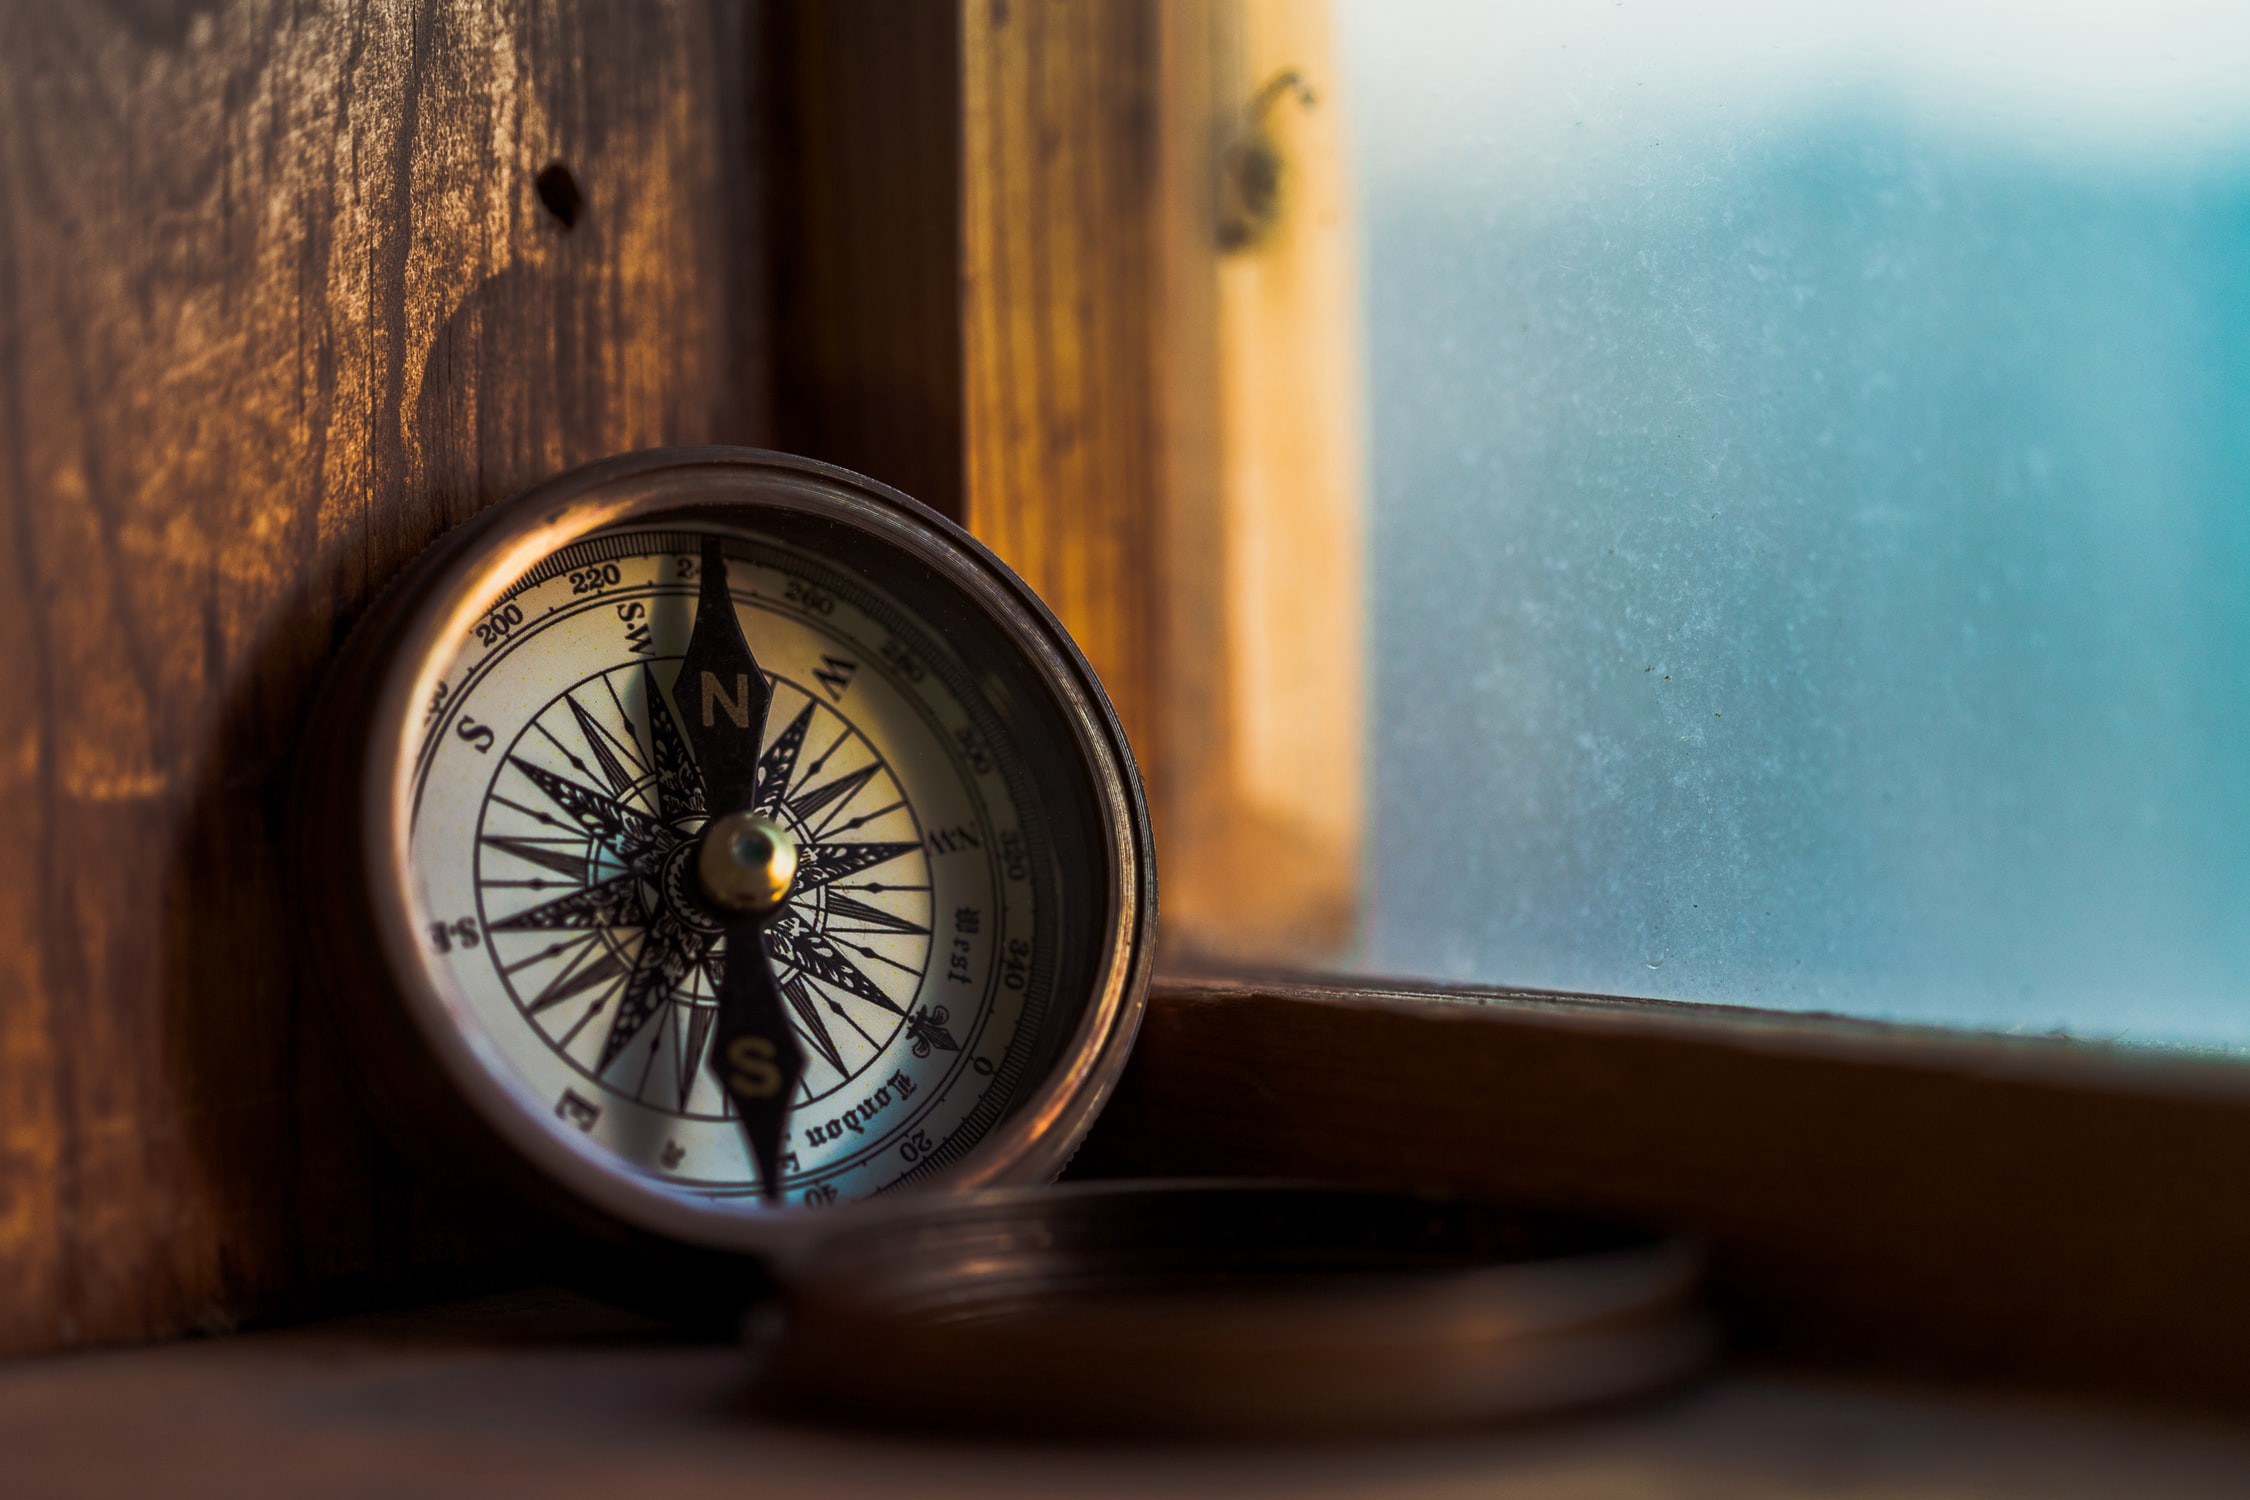

In [161]:
Image("e:/WORK/Python/Raschka/photo.jpeg") 

Photo Credit: Unsplash (@jordanmadrid)

# Exploratory Data Analysis [1/4] – Using D-Tale

7 Billion

* Arzoo/ Editor

* Abhijit Singh/ Data Pundit

Jun 26 · 2020

https://medium.com/da-tum/exploratory-data-analysis-1-4-using-d-tale-99a2c267db79

> American mathematician, John Tukey famously said, “The greatest value of a picture is when it forces us to notice what we never expected to see.” A ‘Data Scientist’ strives to discover and construct meaning from random sets of data.

To start a new project as a data scientist the first step is to create a ‘Project Lifecycle’. It broadly reflects the process that needs to be followed in order to reach the desired results. An understanding of a Project Lifecycle is demonstrated below;

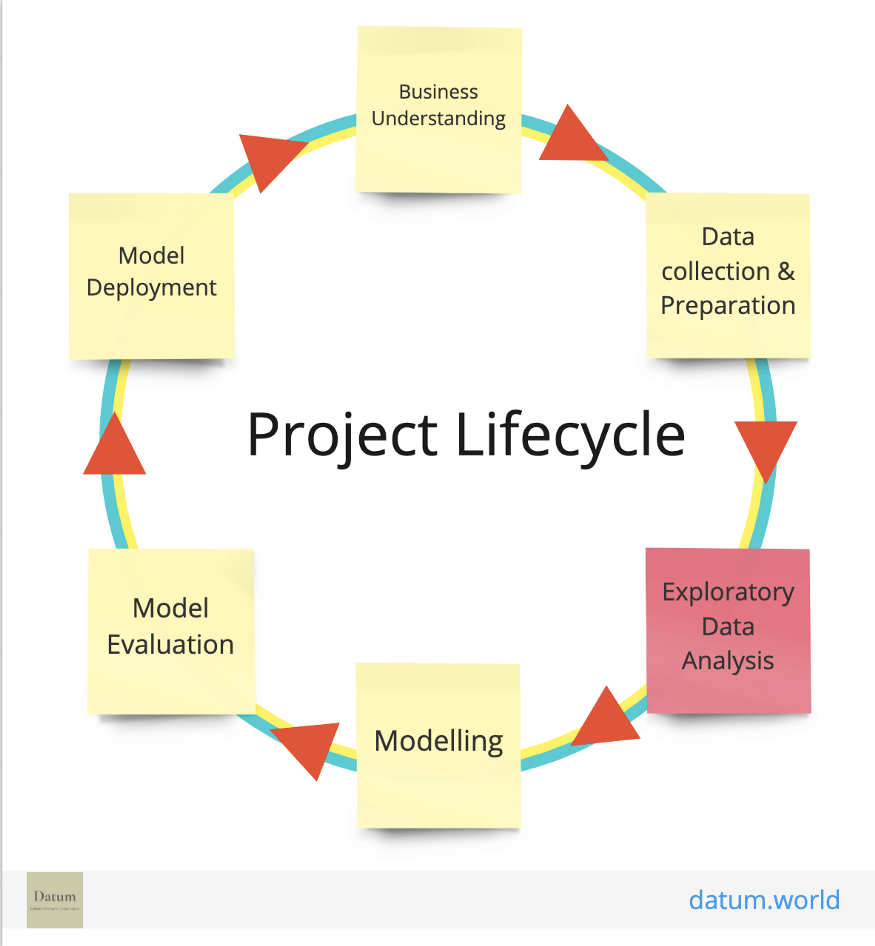

In [139]:
Image("e:/WORK/Python/Raschka/Project Lifecycle.png", width=600) 

The first step of the Data Lifecycle involves an extensive collection of data from the business and about the business. At this stage, the business owner/administration gives out a deep understanding of the business and insights on what they expect to achieve for their organization. After navigating this stage, the data scientist has a pool of ambiguous numbers and information that requires to be made sense of. Exploring the diverse information and making sense of the data collected is critical to uncover facts, correlations, and various other elements of a dataset.

## What is Exploratory Data Analysis

The second step of the Data Lifecycle is the Exploratory Data Analysis. Cleaning and preparation of the collected data is the most arduous task in the process succeeded by EDA. At this step, the lack of clarity on the direction of work and the lack of ways to validate the progress can turn out to be extremely challenging for a data scientist.

One of the major elements of Predictive Modelling is Data Exploration. The history of this information is of prime importance in order to predict new information. EDA can be described as the process of getting familiar with the data by analyzing the relations among each data feature and visualizing the data on a whole to check outliers and hidden trends.

A large amount of time and effort is required in the process of cleaning and exploring the data. On one hand, Data Preparation still requires the same efforts and time, there have been tremendous advancements in terms of Data Exploration. Open-source libraries can be used as a convenient alternative to old school coding. A new no-code or low-code method is the new norm in order to explore complex data.

There are various such libraries and tools. The four competitive ones are:

* D-Tale
* Sweetviz
* Predictive power Score
* Pandas Profiling

## D-Tale

***D-Tale is an interactive web-based library that consists of a Flask backend and a React front-end serving as an easy way to view & analyze Pandas data structures. It integrates seamlessly with ipython notebooks & python/ipython terminals. Currently, this tool supports such Pandas objects as DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex.***

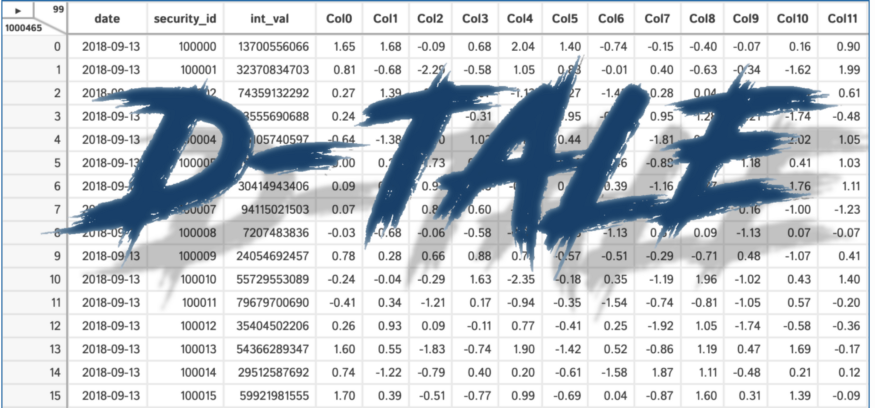

In [143]:
Image("e:/WORK/Python/Raschka/D-Tale window.png") 

D-Tale was the product of a SAS to Python conversion. What was originally a Perl script wrapper on top of SAS’s insight function is now a lightweight web client on top of Pandas data structures.

How to install D-tale for PyPI

```Python
pip install dtale
```

How to install D-Tale for conda

```Python
conda config --add channels conda-forge
conda install dtale
```

After installing D-Tale, import to the working environment using


```Python
import dtale
import pandas as pd
```

Launch D-Tale application on localhost

```Python
df = pd.read_csv('data.csv')
d = dtale.show(df)
d.open_browser()
```

In [157]:
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [158]:
d = dtale.show(data_boston)

In [159]:
d.open_browser()

Below is an example of a housing dataset:

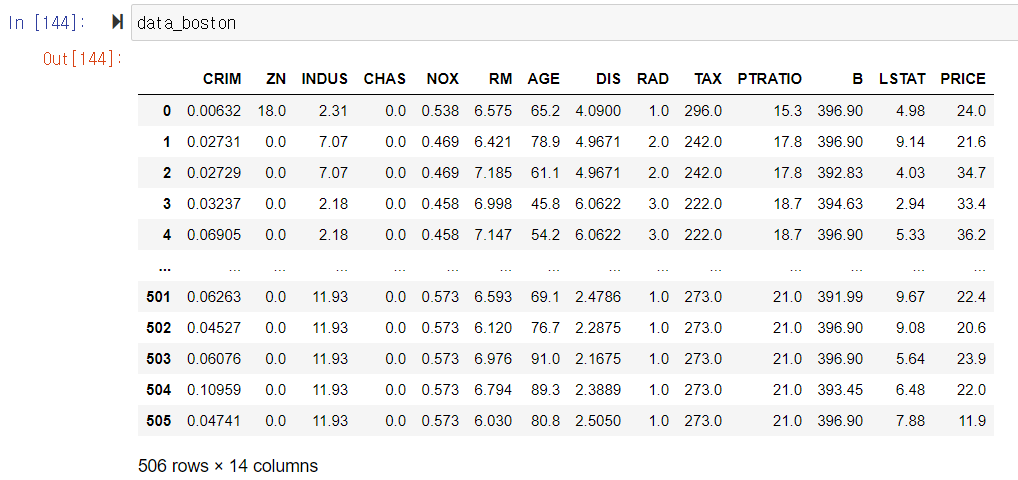

In [147]:
Image("e:/WORK/Python/Raschka/Dataframe on Jupyter Notebook.png") 

After the application is launched, the user can access an **interactive table** to perform multiple actions and visualize the dataset.

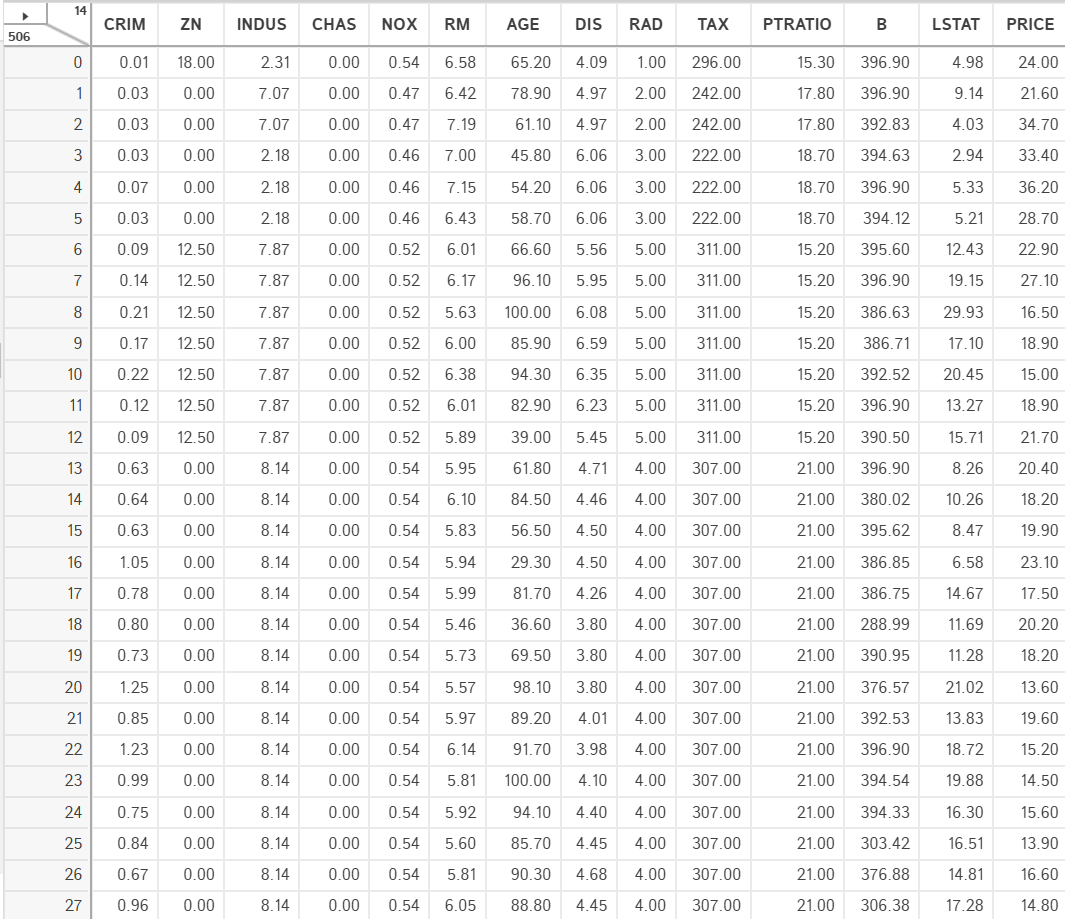

In [151]:
Image("e:/WORK/Python/Raschka/data frame on D-Tale window.png") 

The upper left corner shows the **length of the data**. In the above case, it is (506x14).

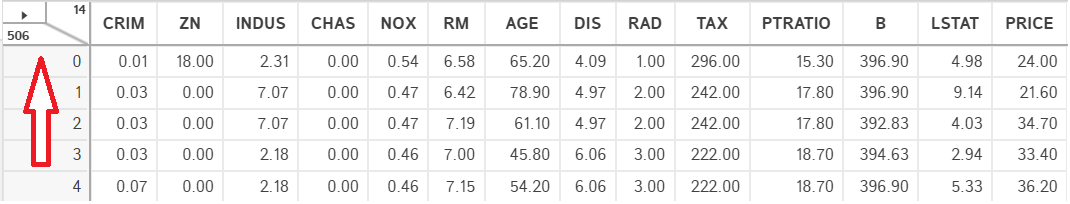

In [150]:
Image("e:/WORK/Python/Raschka/Data length indicator.png") 

A **menu** pops out from the left side of the browser window by clicking on the arrow, as depicted below:

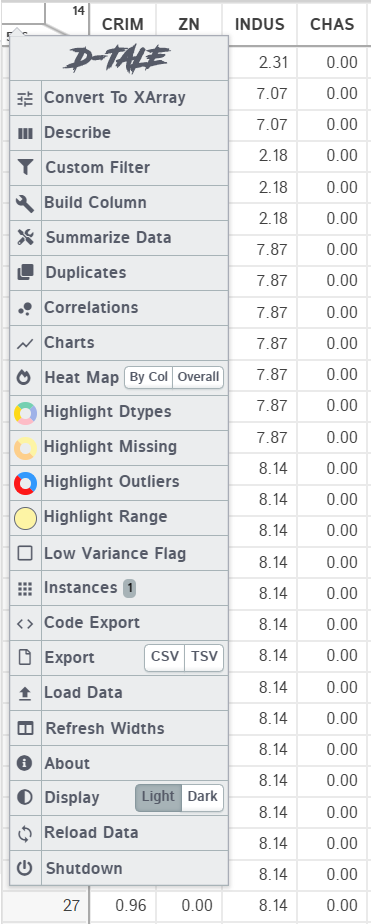

In [154]:
Image("e:/WORK/Python/Raschka/menu bar.png", width=300) 

**Convert to XArray**: A pandas data frame in D-Tale gives the viewer the option to convert data to a Xarray.Dataset.

The user is required to select one of many columns as an index in order to convert data frame to a dataset. (df.set_index([…]).to_xarray()) which makes toggling between indexes slices much easier.

Pandas Dataframe: It is a method used to calculate various statistical data like percentile, mean, standard deviation for the numeric values of the data frame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

* Data Describe feature in D-Tale

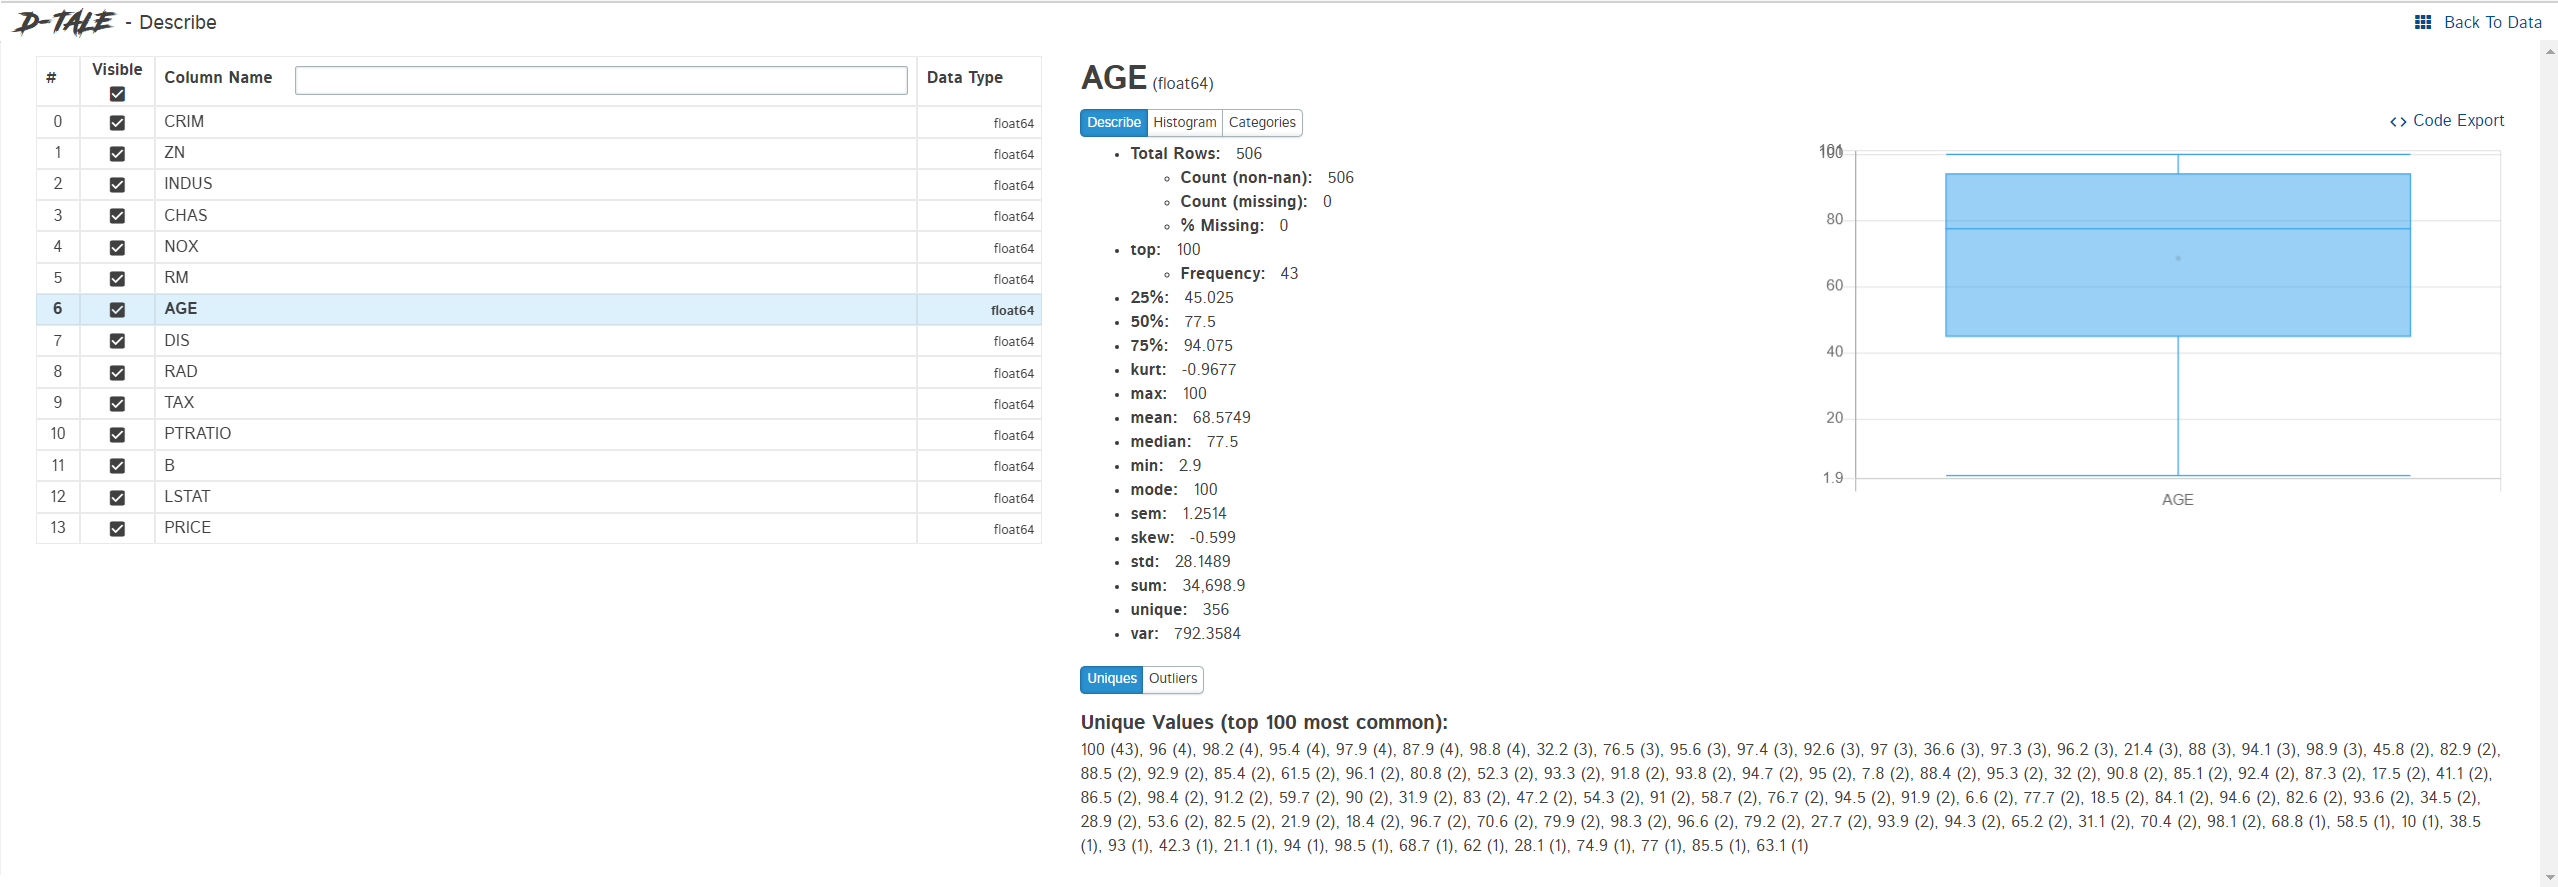

In [155]:
Image("e:/WORK/Python/Raschka/Data Describe feature in D-Tale.png")

**Custom Filter**: The feature enables the user to query the data, slice and dice it as per the requirements.

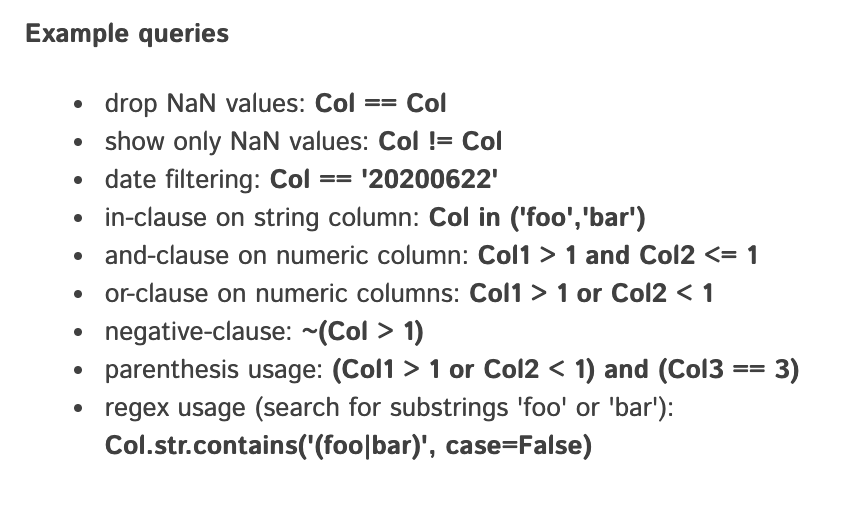

In [164]:
Image("e:/WORK/Python/Raschka/Example queries.png", width=500)

**Summarise Data**

This is one of the most powerful features of the library that allows the users to create a new data frame from the existing data by **Grouping** the data by various columns, **Pivoting** the data, and **Transposing** the data frame.


**Charts**

This enables the users to create quick custom charts to visualise data by using Plotly DataViz. In order to create a chart, the user is required to pick a value for X & Y inputs which effectively drives the data along the X & Y axes. In the case of a 3-Dimensional chart (heatmap, 3D Scatter, Surface) value for the Z-axis is added as well.


**Copy Link**

By clicking on the “Copy Link” button the user will be able to save a pre-populated chart URL into the clipboard. This can be used to send the chart to others. Importantly, the D-Tale process must be running when the link is opened to the original chart.


**Exporting Charts**

The dash charts (expect Word-clouds) can be exported to HTML files. This makes it easier to save and send files. The JavaScript for plotly is embedded in these files. This gives the user an excellent experience with zooming, panning, etc in the files.


**Exporting CSV**

Through this button, the user is able to export data available in the chart to a CSV for further analysis in tools like Excel.


**Heatmap**

This function is used to apply a background color to each cell.
Each float is renormalized to be a value between 0 and 1.0.

* By Col: each value is calculated based on the min/max of its column
* Overall: each value is calculated by the overall min/max of all the non-hidden float/int columns in the dataset


**Correlation**

One of most critical steps of feature selection for any predictive analysis is ‘*Building a Correlation Matrix*’. Instead of writing codes for each column combination, the user is able to see the correlations at once.


**Outlier Detections**

The integer and float columns has a ‘describe’ button on the lower right corner. This button is for Outliers right next to Unique Values.

There are few highlight options are available which will help you in **highlighting** the missing data fields.

**Code Export** is a feature that allows the user to get code by editing or reusing the code. To successfully use the code, the user is required to copy and paste the code in a particular working environment.